1) **Train (обучающая выборка)**

На train модель “учится”: подбирает параметры (веса), пытается минимизировать ошибку.

Ассоциация: ты решаешь задачи из сборника — это тренировка.

2) **Validation (валидационная выборка)**

На val ты настраиваешь модель: выбираешь гиперпараметры (например, глубину дерева, силу регуляризации), выбираешь порог вероятности, выбираешь “лучший вариант” модели.

Ассоциация: пробник/контрольная перед экзаменом. Ты не учишься “по ответам”, ты проверяешь, как идёт подготовка, и меняешь стратегию.

3) **Test (тестовая выборка)**

Test — это “экзамен”. Его нельзя использовать для настройки.
Он нужен один раз в конце, чтобы честно оценить, как модель работает на новых данных.

Ассоциация: официальный экзамен. Если ты “подсматривала ответы” (подбирала параметры по test) — оценка уже нечестная.

4) **Метрики: accuracy и F1 (и почему одной accuracy часто мало)** 

https://scikit-learn.org/stable/modules/model_evaluation.html  
Accuracy (точность)

Accuracy = доля правильных ответов из всех.

Хорошо подходит, когда классы примерно сбалансированы и цена ошибок одинаковая.

Плохой пример (дисбаланс):
Допустим, у тебя 95% “не спам” и 5% “спам”.
Если модель всегда говорит “не спам”, accuracy будет 95% — звучит круто, но спам она не ловит вообще.

Precision / Recall (чтобы понять F1)

Precision: из всех “положительных” предсказаний, сколько реально положительные
(не хотим ложных тревог)

Recall: из всех реальных положительных, сколько мы нашли
(не хотим пропусков)

F1-score

F1 = гармоническое среднее precision и recall.
Полезно, когда:

классы несбалансированы

важно одновременно и не пропускать, и не шуметь ложными срабатываниями

Официально в sklearn: F1 — harmonic mean precision/recall.

Ассоциация:

Precision — “когда тревога сработала, правда ли это?”

Recall — “сколько опасных случаев мы вообще заметили?”

F1 — “общий баланс”: и не пропускать, и не орать зря.

# Основные функции 

**train_test_split**

train_test_split нужна, чтобы случайно разделять данные на две части (обычно train и test, иногда train и val) случайным образом, чтобы:

train: на этой части модель обучается

test/val: на этой части ты проверяешь качество на “новых” данных

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

In [2]:
import sys
print(sys.executable)

/Users/mariaburtseva/Documents/проект грант/slr-env/.venv/bin/python


In [ ]:
python -m pip install -U scikit-learn
python -c "import sklearn; print(sklearn.__version__)"
#установка sklearn

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
list(y)

[0, 1, 2, 3, 4]

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
list(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train
y_train
X_test
y_test

[1, 4]

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

#range(5) — это метки для 5 объектов:
#0,1,2,3,4

#То есть у нас 5 объектов в X, и для каждого есть метка из y.

print(X)
list(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train
y_train
X_test
y_test
train_test_split(y, shuffle=False)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


[[0, 1, 2], [3, 4]]

Теперь ты прям увидишь, какие строки X ушли в train/test.

In [21]:
idx = np.arange(len(X))  # [0,1,2,3,4]
idx_train, idx_test = train_test_split(idx, test_size=0.33, random_state=42)
print("train idx:", idx_train)
print("test idx:", idx_test)
print("X[train]:\n", X[idx_train])
print("X[test]:\n", X[idx_test])
y_list = list(y)
print("y train:", [y_list[i] for i in idx_train])
print("y test :", [y_list[i] for i in idx_test])

train idx: [2 0 3]
test idx: [1 4]
X[train]:
 [[4 5]
 [0 1]
 [6 7]]
X[test]:
 [[2 3]
 [8 9]]
y train: [2, 0, 3]
y test : [1, 4]


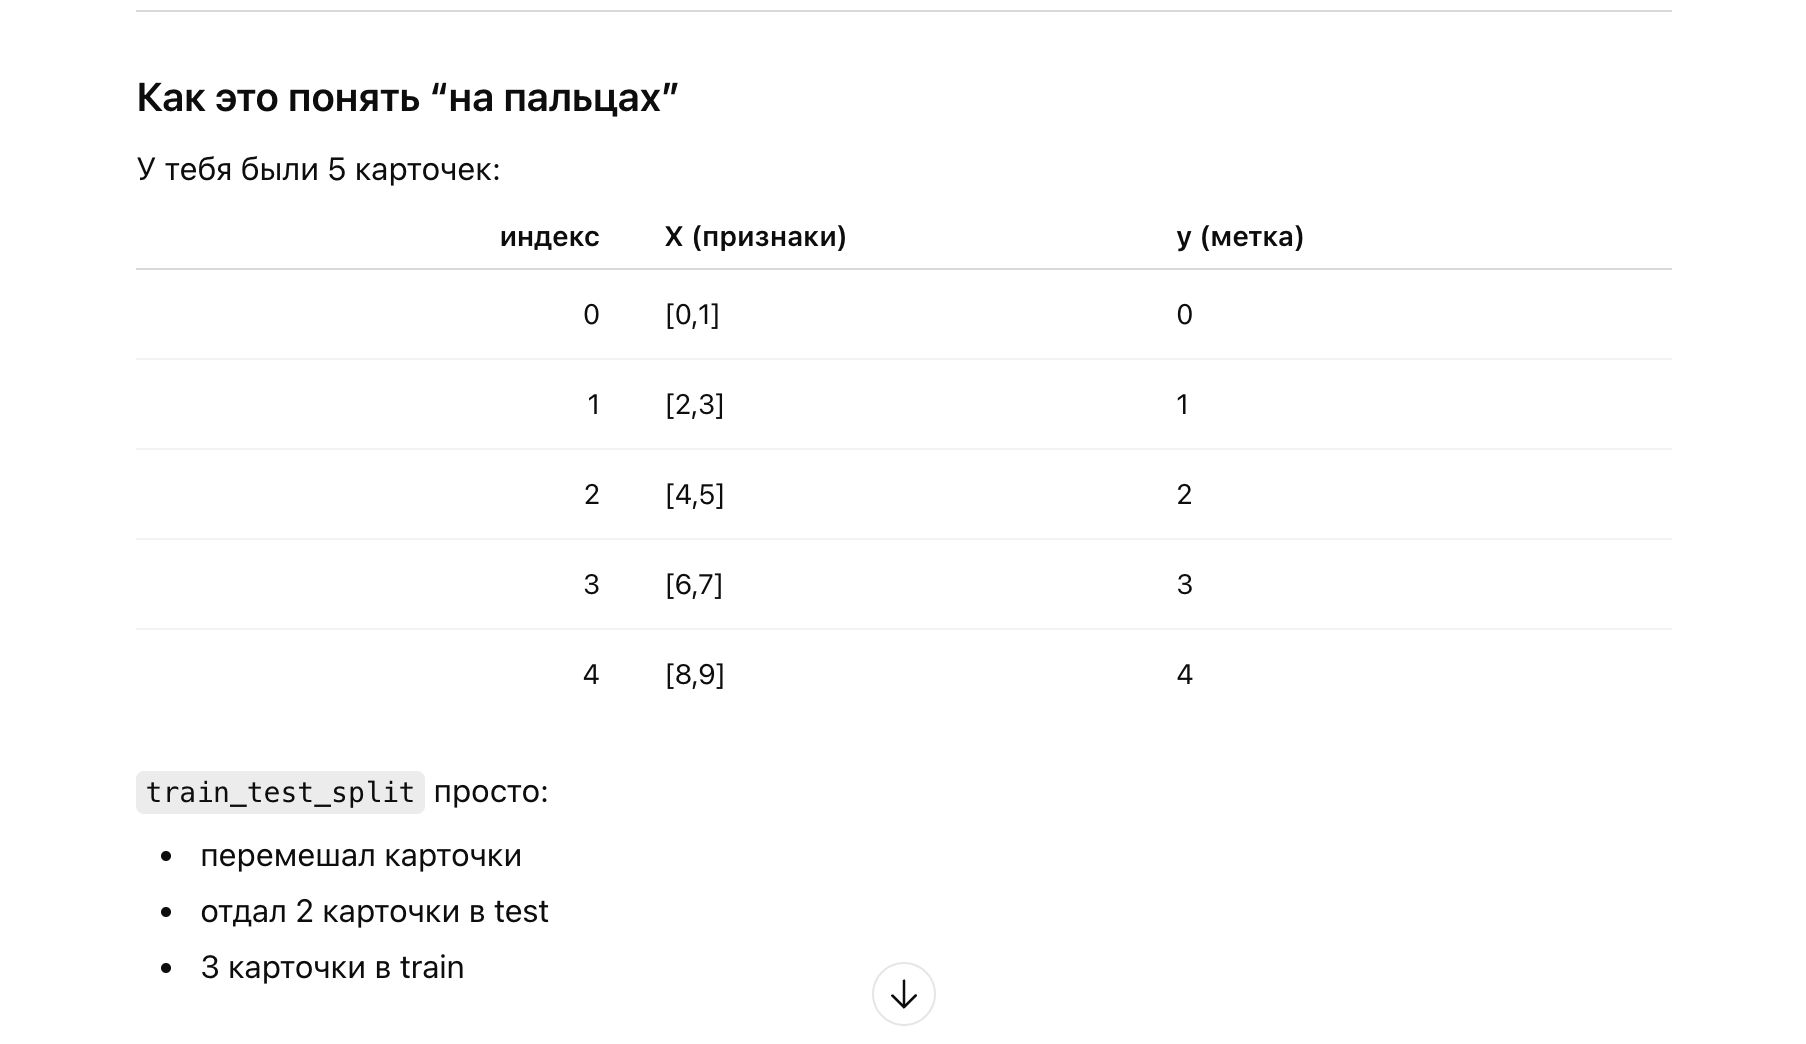

Ассоциация:
X = задания в тетрадке, y = ответы в конце (ключ).
Индекс — это просто номер страницы.

# Пример из твоего проекта (жесты)

X = координаты 21 точки руки (и/или позы) по кадрам

y = какой это жест: “привет”, “спасибо”, “да”, “нет”…

Без y ты не сможешь обучить модель “переводить жесты”, потому что не будет “правильного перевода” для обучения.

In [ ]:
# сначала установить модули в баш
python -m pip install pandas


загрузить готовый датасет и разделить его на признаки X и метки y.

In [29]:
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
X, y = iris['data'], iris['target']
X.head()
y.head()



0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [30]:
print(X.shape)
print(y.value_counts())


(150, 4)
target
0    50
1    50
2    50
Name: count, dtype: int64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)
X_train.head()
y_train.head()
X_test.head()
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int64

# f1_score 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?utm_source=chatgpt.com

f1_score — это метрика для классификации, которая одним числом оценивает баланс между:

precision (насколько “чисто” ты находишь класс, без ложных срабатываний)

recall (насколько “полно” ты находишь класс, без пропусков)

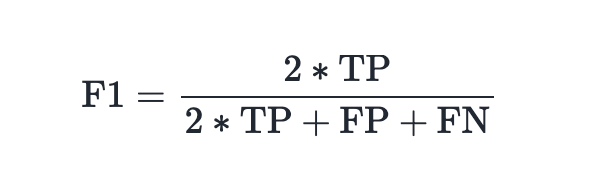

In [36]:
import numpy as np
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')
f1_score(y_true, y_pred, average='micro')
f1_score(y_true, y_pred, average='weighted')
f1_score(y_true, y_pred, average=None)

array([0.8, 0. , 0. ])

In [37]:
# binary classification
y_true_empty = [0, 0, 0, 0, 0, 0]
y_pred_empty = [0, 0, 0, 0, 0, 0]
f1_score(y_true_empty, y_pred_empty)
f1_score(y_true_empty, y_pred_empty, zero_division=1.0)
f1_score(y_true_empty, y_pred_empty, zero_division=np.nan)

/Users/mariaburtseva/Documents/проект грант/slr-env/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


nan

In [38]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
f1_score(y_true, y_pred, average=None)

array([0.66666667, 1.        , 0.66666667])

# precision_recall_fscore_support 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html?utm_source=chatgpt.com

precision_recall_fscore_support — это функция из sklearn.metrics, которая считает сразу четыре вещи по результатам классификации:

precision

recall

f1-score

support (сколько объектов каждого класса было в истинных метках)

Обычно возвращает значения по каждому классу отдельно (например, для классов 0,1,2), либо усреднённые, если указать average=.

In [39]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_recall_fscore_support(y_true, y_pred, average='micro')
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)


Вместо усреднения можно вычислять точность, полноту, F1-меру и поддержку для каждой метки отдельно:

In [40]:
precision_recall_fscore_support(y_true, y_pred, average=None,
labels=['pig', 'dog', 'cat'])

(array([0.        , 0.        , 0.66666667]),
 array([0., 0., 1.]),
 array([0. , 0. , 0.8]),
 array([2, 2, 2]))